<a href="https://colab.research.google.com/github/dravichi/CODSOFT/blob/main/Irish_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Irish Flower Classification - Codsoft Internship**

**Importing Essential Libraries**

In [29]:
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Import Dataset**

In [2]:
files.upload()
df = pd.read_csv('IRIS.csv')

Saving IRIS.csv to IRIS.csv


**Data Overview**

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.describe(include=object).T

,count,unique,top,freq
species,150,3,Iris-setosa,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Visualization**

Text(0.5, 1.0, 'Sepal Length According To Species')

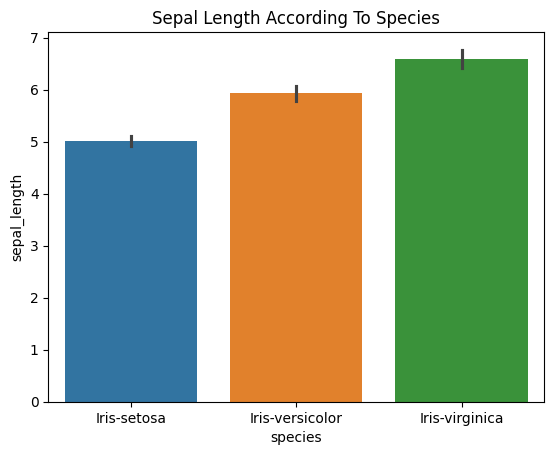

In [18]:
sns.barplot(df, x="species", y="sepal_length", hue="species", legend=False).set_title("Sepal Length According To Species")

Text(0.5, 1.0, 'Sepal Width According To Species')

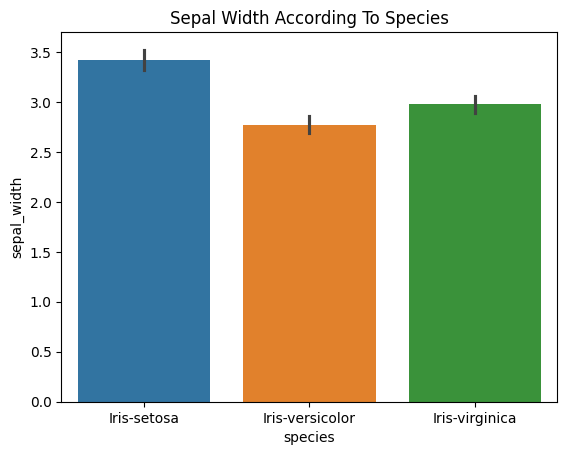

In [19]:
sns.barplot(df, x="species", y="sepal_width", hue="species", legend=False).set_title("Sepal Width According To Species")

Text(0.5, 1.0, 'Petal Length According To Species')

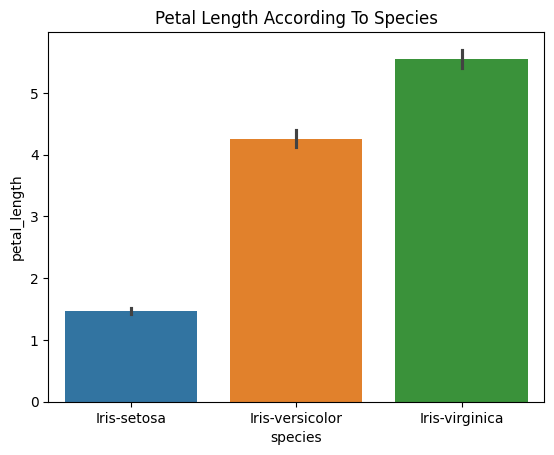

In [20]:
sns.barplot(df, x="species", y="petal_length", hue="species", legend=False).set_title("Petal Length According To Species")

Text(0.5, 1.0, 'Petal Width According to Species')

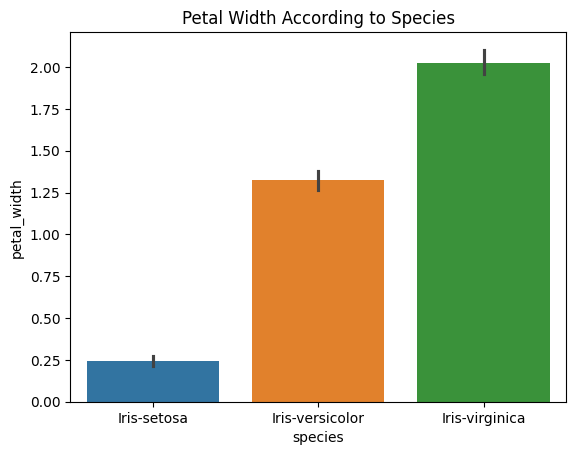

In [16]:
sns.barplot(df, x="species", y="petal_width", hue="species", legend=False).set_title("Petal Width According To Species")

**Dealing With Categorical Values**

In [22]:
encoder = LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

**Relation Between Numerical Variables**

Text(0.5, 1.0, 'Relation Between Numerical Variables')

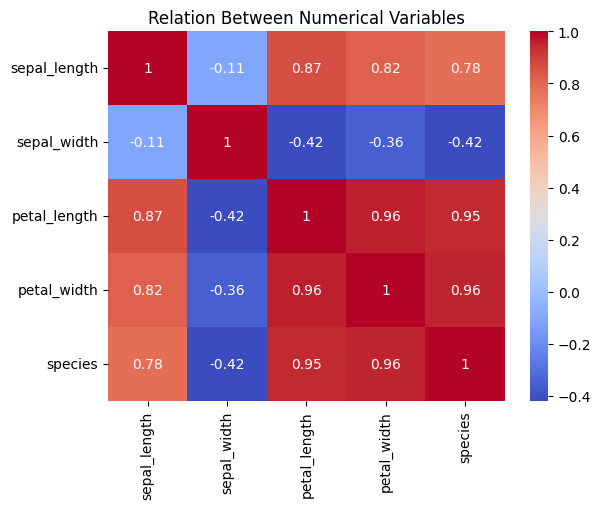

In [24]:
numerical = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm').set_title('Relation Between Numerical Variables')

**Splitting Dataset Into Training and Testing**

In [26]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training Dataset**

In [27]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Model Evaluation**

In [28]:
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 100.0%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

